   cust_id    name    city
0        1   Alice  Berlin
1        2     Bob   Paris
2        3  Carlos    Rome
3        4    Dina  London
   prod_id     product  price
0      101      Laptop   1200
1      102       Phone    800
2      103      Tablet    600
3      104  Headphones    150
   sale_id  cust_id  prod_id  quantity       date
0        1        1      101         1 2024-07-01
1        2        2      102         2 2024-07-02
2        3        1      104         3 2024-07-03
3        4        3      103         1 2024-07-04
4        5        2      101         1 2024-07-05
5        6        4      104         2 2024-07-06
6        7        1      102         1 2024-07-07
7        8        3      101         1 2024-07-08
   cust_id    name    city  sale_id  prod_id  quantity       date     product  \
0        1   Alice  Berlin        1      101         1 2024-07-01      Laptop   
1        1   Alice  Berlin        3      104         3 2024-07-03  Headphones   
2        1   Alice  Be

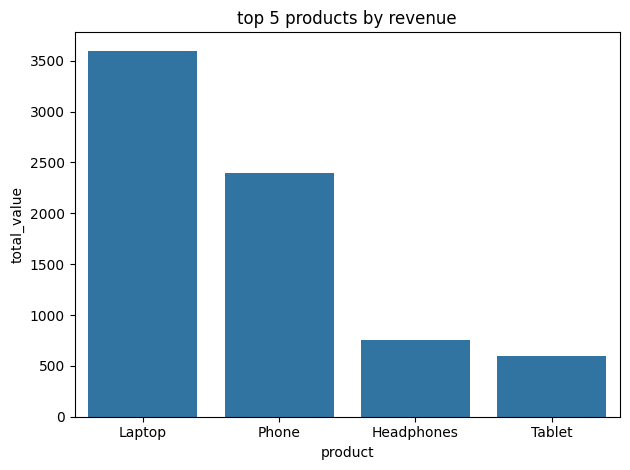

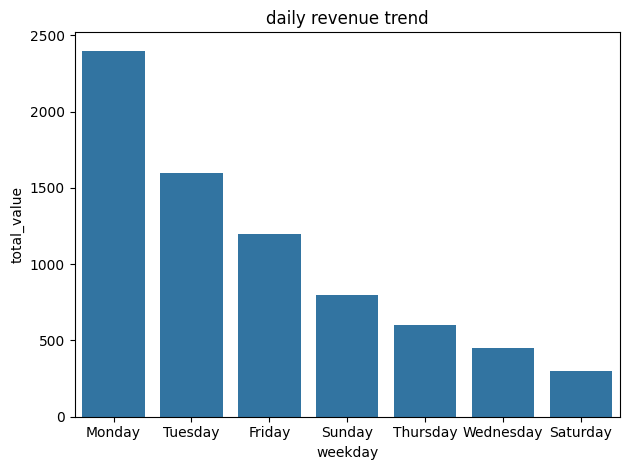

In [29]:
import pandas as pd

customers = pd.DataFrame({
    "cust_id": [1, 2, 3, 4],
    "name": ["Alice", "Bob", "Carlos", "Dina"],
    "city": ["Berlin", "Paris", "Rome", "London"]
})

products = pd.DataFrame({
    "prod_id": [101, 102, 103, 104],
    "product": ["Laptop", "Phone", "Tablet", "Headphones"],
    "price": [1200, 800, 600, 150]
})

sales = pd.DataFrame({
    "sale_id": range(1, 9),
    "cust_id": [1, 2, 1, 3, 2, 4, 1, 3],
    "prod_id": [101, 102, 104, 103, 101, 104, 102, 101],
    "quantity": [1, 2, 3, 1, 1, 2, 1, 1],
    "date": pd.date_range("2024-07-01", periods=8, freq="D")
})

print(customers)
print(products)
print(sales)

df = pd.merge(customers,sales,on="cust_id",how="left")
df1= pd.merge(df,products,on="prod_id",how="left")
df1["total_value"] = df1["price"] * df1["quantity"]

print(df1)

df1["month"] = df1["date"].dt.month    #extract month from date
df1['weekday'] = df1['date'].dt.day_name()   #extract weekday name
df1["week_number"] = df1["date"].dt.isocalendar().week    #extrat week number

print(df1)

weekday_sales = df1.groupby("weekday")["total_value"].sum().sort_values(ascending=False).reset_index()

print(weekday_sales)

city_stats = (df1
             .groupby("city")
             .agg(
                 total_revenue = ("total_value","sum"),
                 avg_order_value = ("total_value","mean"),
                 unique_customers = ("cust_id","nunique")
             ))
print(city_stats)

top_products = df1.groupby("product")["total_value"].sum().sort_values(ascending=False).reset_index()
top_customer = df1.groupby("name")["total_value"].sum().sort_values(ascending=False).reset_index()

print(top_products)
print(top_customer)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=top_products.head(5),x="product",y="total_value")
plt.title("top 5 products by revenue")
plt.tight_layout()
plt.show()

sns.barplot(data=weekday_sales,x="weekday",y="total_value")
plt.title("daily revenue trend")
plt.tight_layout()
plt.show()
